In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model



In [3]:
import os
print(os.getcwd())  # Esto imprime el directorio desde el que se está ejecutando el código
df = pd.read_csv('../data/diamonds.csv')


c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\Diamantes\notebooks


In [4]:
df = pd.read_csv('../data/diamonds.csv')


In [5]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (53940, 11)
Nombre columnas: Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


# Explicación Variables

carat: Peso del diamante en quilates. El rango de peso va de 0.2 a 5.01 quilates. 

cut: La calidad del corte del diamante. Los niveles de calidad son categorizados en 5 grupos: Fair (Regular), Good (Bueno), Very Good (Muy Bueno), Premium (Premium), e Ideal (Ideal). Un buen corte es fundamental porque maximiza el brillo y apariencia del diamante.

color: El color del diamante, clasificado desde la letra J (peor calidad de color) hasta la letra D (mejor calidad de color). Los diamantes de calidad superior se acercan más a la transparencia total, mientras que los de calidad inferior pueden tener tonos amarillentos o marrones.

clarity: La claridad del diamante, que mide cuán claro o "limpio" es el diamante en términos de inclusiones y manchas internas. Las categorías de claridad, de peor a mejor, son: I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, e IF (mejor). Cuanto más limpio sea el diamante, mayor será su valor.

x: Longitud del diamante en milímetros. El valor mínimo es 0 mm y el máximo es 10.74 mm.

y: Ancho del diamante en milímetros. El rango va de 0 mm a 58.9 mm.

z: Profundidad del diamante en milímetros. El valor mínimo es 0 mm y el máximo es 31.8 mm.

depth: Porcentaje de la profundidad total del diamante. Los valores de profundidad están en un rango de 43% a 79%. Este valor es importante para determinar el brillo y la apariencia general del diamante; profundidades extremas pueden hacer que el diamante luzca opaco.

table: Ancho de la parte superior del diamante en relación con su punto más ancho, expresado como un porcentaje. El valor mínimo es 43% y el máximo es 95%. El "table" es otra medida que afecta la interacción del diamante con la luz, y por tanto, su apariencia.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [30]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [29]:
df = df.drop(columns=['Unnamed: 0'])


KeyError: "['Unnamed: 0'] not found in axis"

In [31]:
numericas = df.select_dtypes(include=['number']).columns.tolist()
categoricas = df.select_dtypes(exclude=['number']).columns.tolist()

print("Variables Numéricas:", numericas)
print("Variables Categóricas:", categoricas)

Variables Numéricas: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Variables Categóricas: ['cut', 'color', 'clarity']


In [32]:
min = df.min(numeric_only=True)
max = df.max(numeric_only=True)

variables = min.index
rangos = pd.DataFrame({
    'Mínimo': min.values,
    'Máximo': max.values,
    'Rango': max - min
})
rangos

,Mínimo,Máximo,Rango
carat,0.2,5.01,4.81
depth,43.0,79.00,36.00
table,43.0,95.00,52.00
price,326.0,18823.00,18497.00
x,0.0,10.74,10.74
y,0.0,58.90,58.90
z,0.0,31.80,31.80


In [33]:
df.describe().round(2)


,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


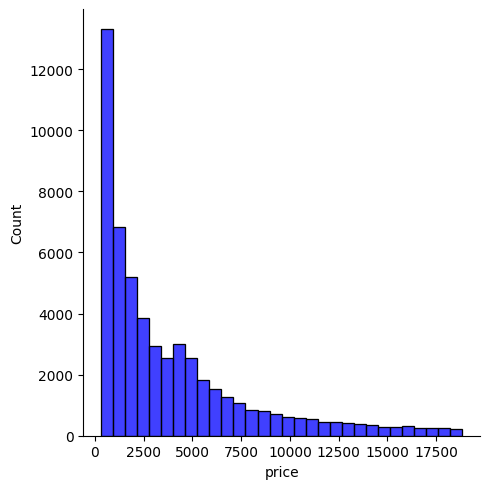

In [34]:
sns.displot(df, x='price', kde=False, bins=30, color='blue', rug=False)


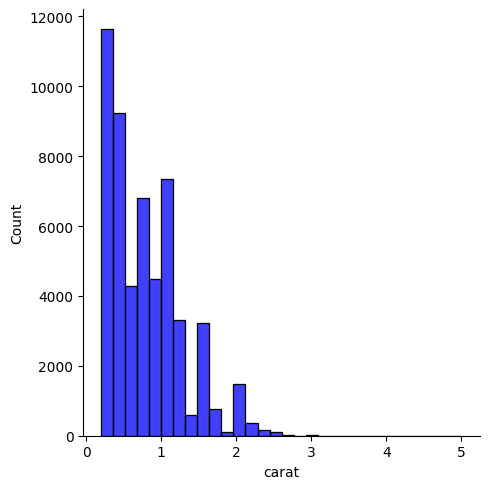

In [35]:
sns.displot(df, x='carat', kde=False, bins=30, color='blue', rug=False)


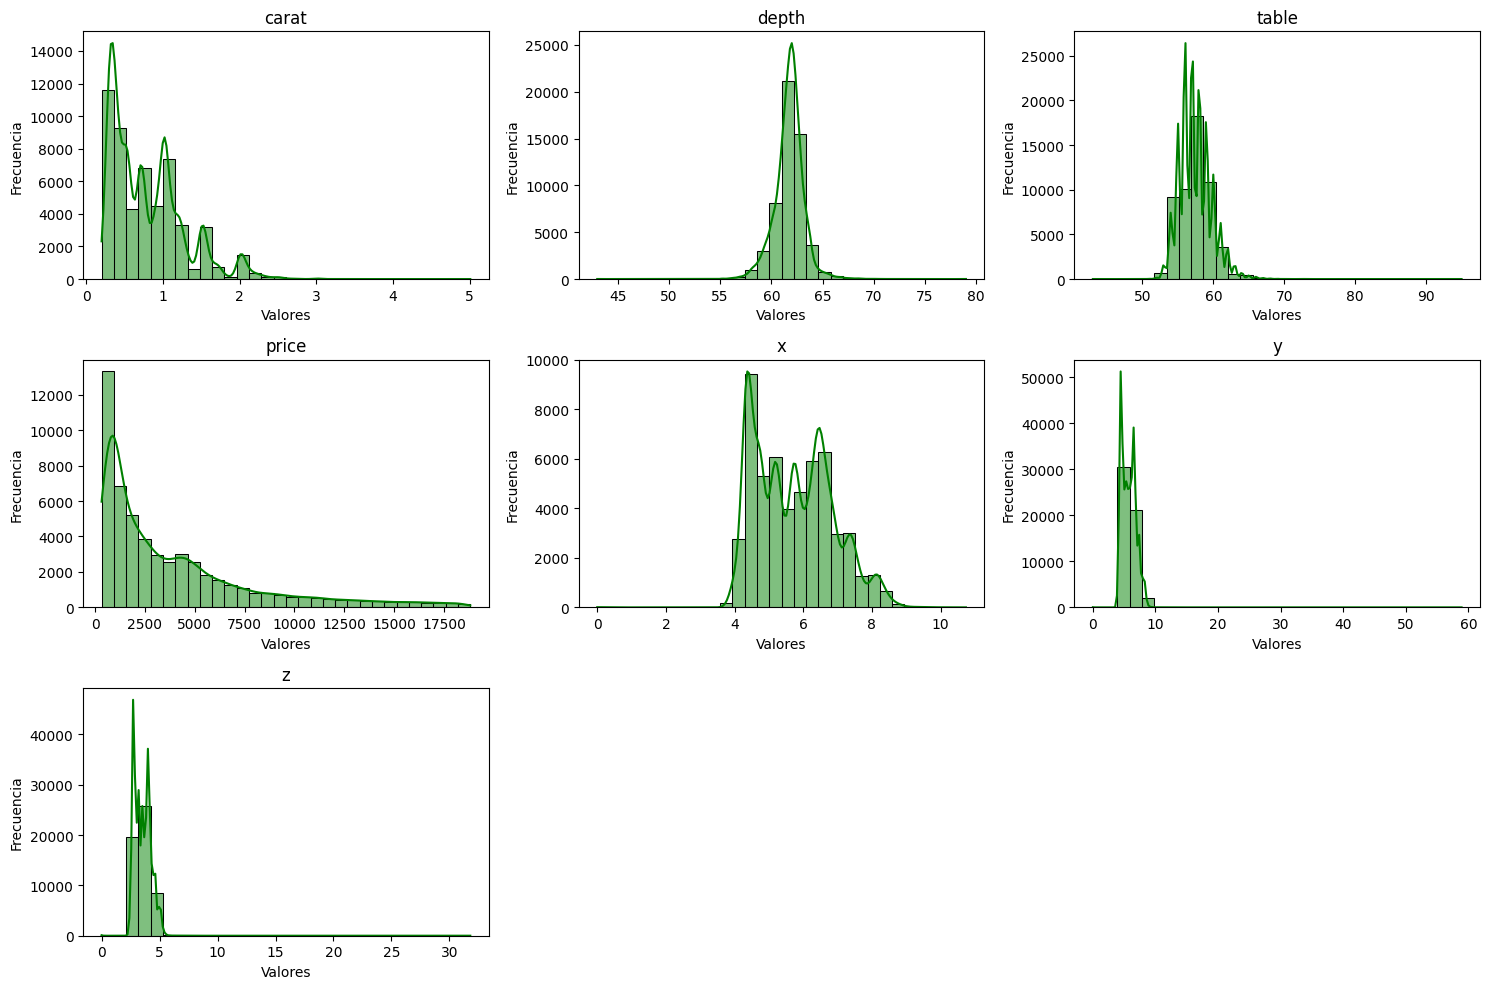

In [37]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Unnamed: 0' in numericas:
    numericas.remove('Unnamed: 0')

# Crear gráficos
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según sea necesario
for i, column in enumerate(numericas):
    plt.subplot(3, 3, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    sns.histplot(df[column], bins=30, kde=True, color='green', ax=plt.gca())  # Histograma con KDE
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Precio')

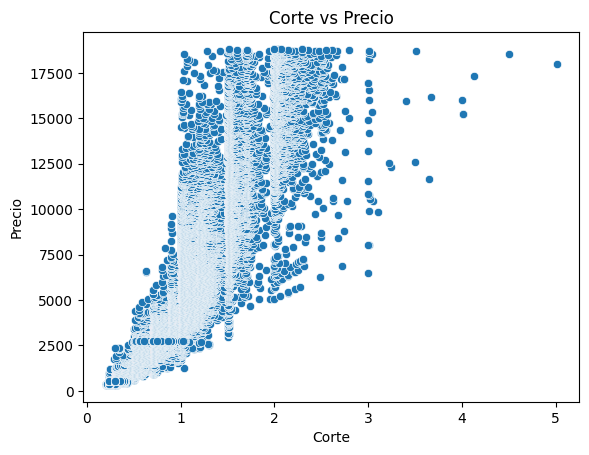

In [17]:
sns.scatterplot(data=df, x='carat', y='price', palette='deep')
plt.title('Corte vs Precio')
plt.xlabel('Corte')
plt.ylabel('Precio')


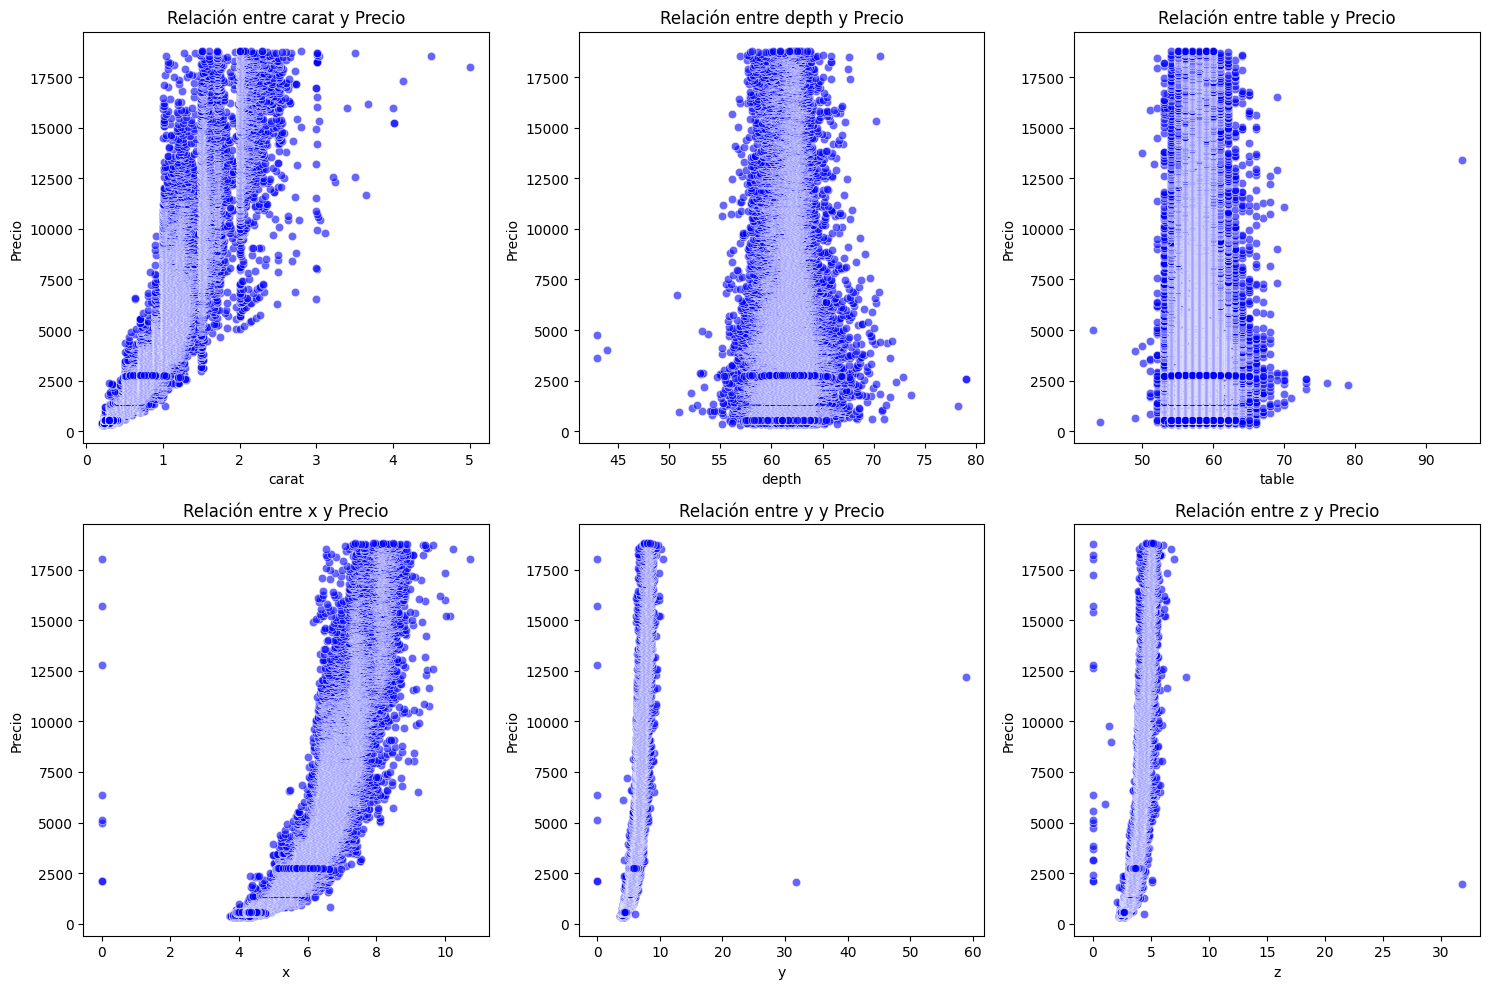

In [22]:
if 'Unnamed: 0' in numericas:
    numericas.remove('Unnamed: 0')

# Crear gráficos de dispersión
plt.figure(figsize=(15, 10))

# Remover 'price' de la lista para no incluirla como variable independiente
numericas.remove('price')

for i, var in enumerate(numericas, start=1):
    plt.subplot(2, 3, i)  # Crear un gráfico en una cuadrícula de 2 filas y 3 columnas
    sns.scatterplot(data=df, x=var, y='price', alpha=0.6, color='blue')

    # Títulos y etiquetas
    plt.title(f'Relación entre {var} y Precio')
    plt.xlabel(var)
    plt.ylabel('Precio')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [20]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns') # Changed 'columns' to axis='columns'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

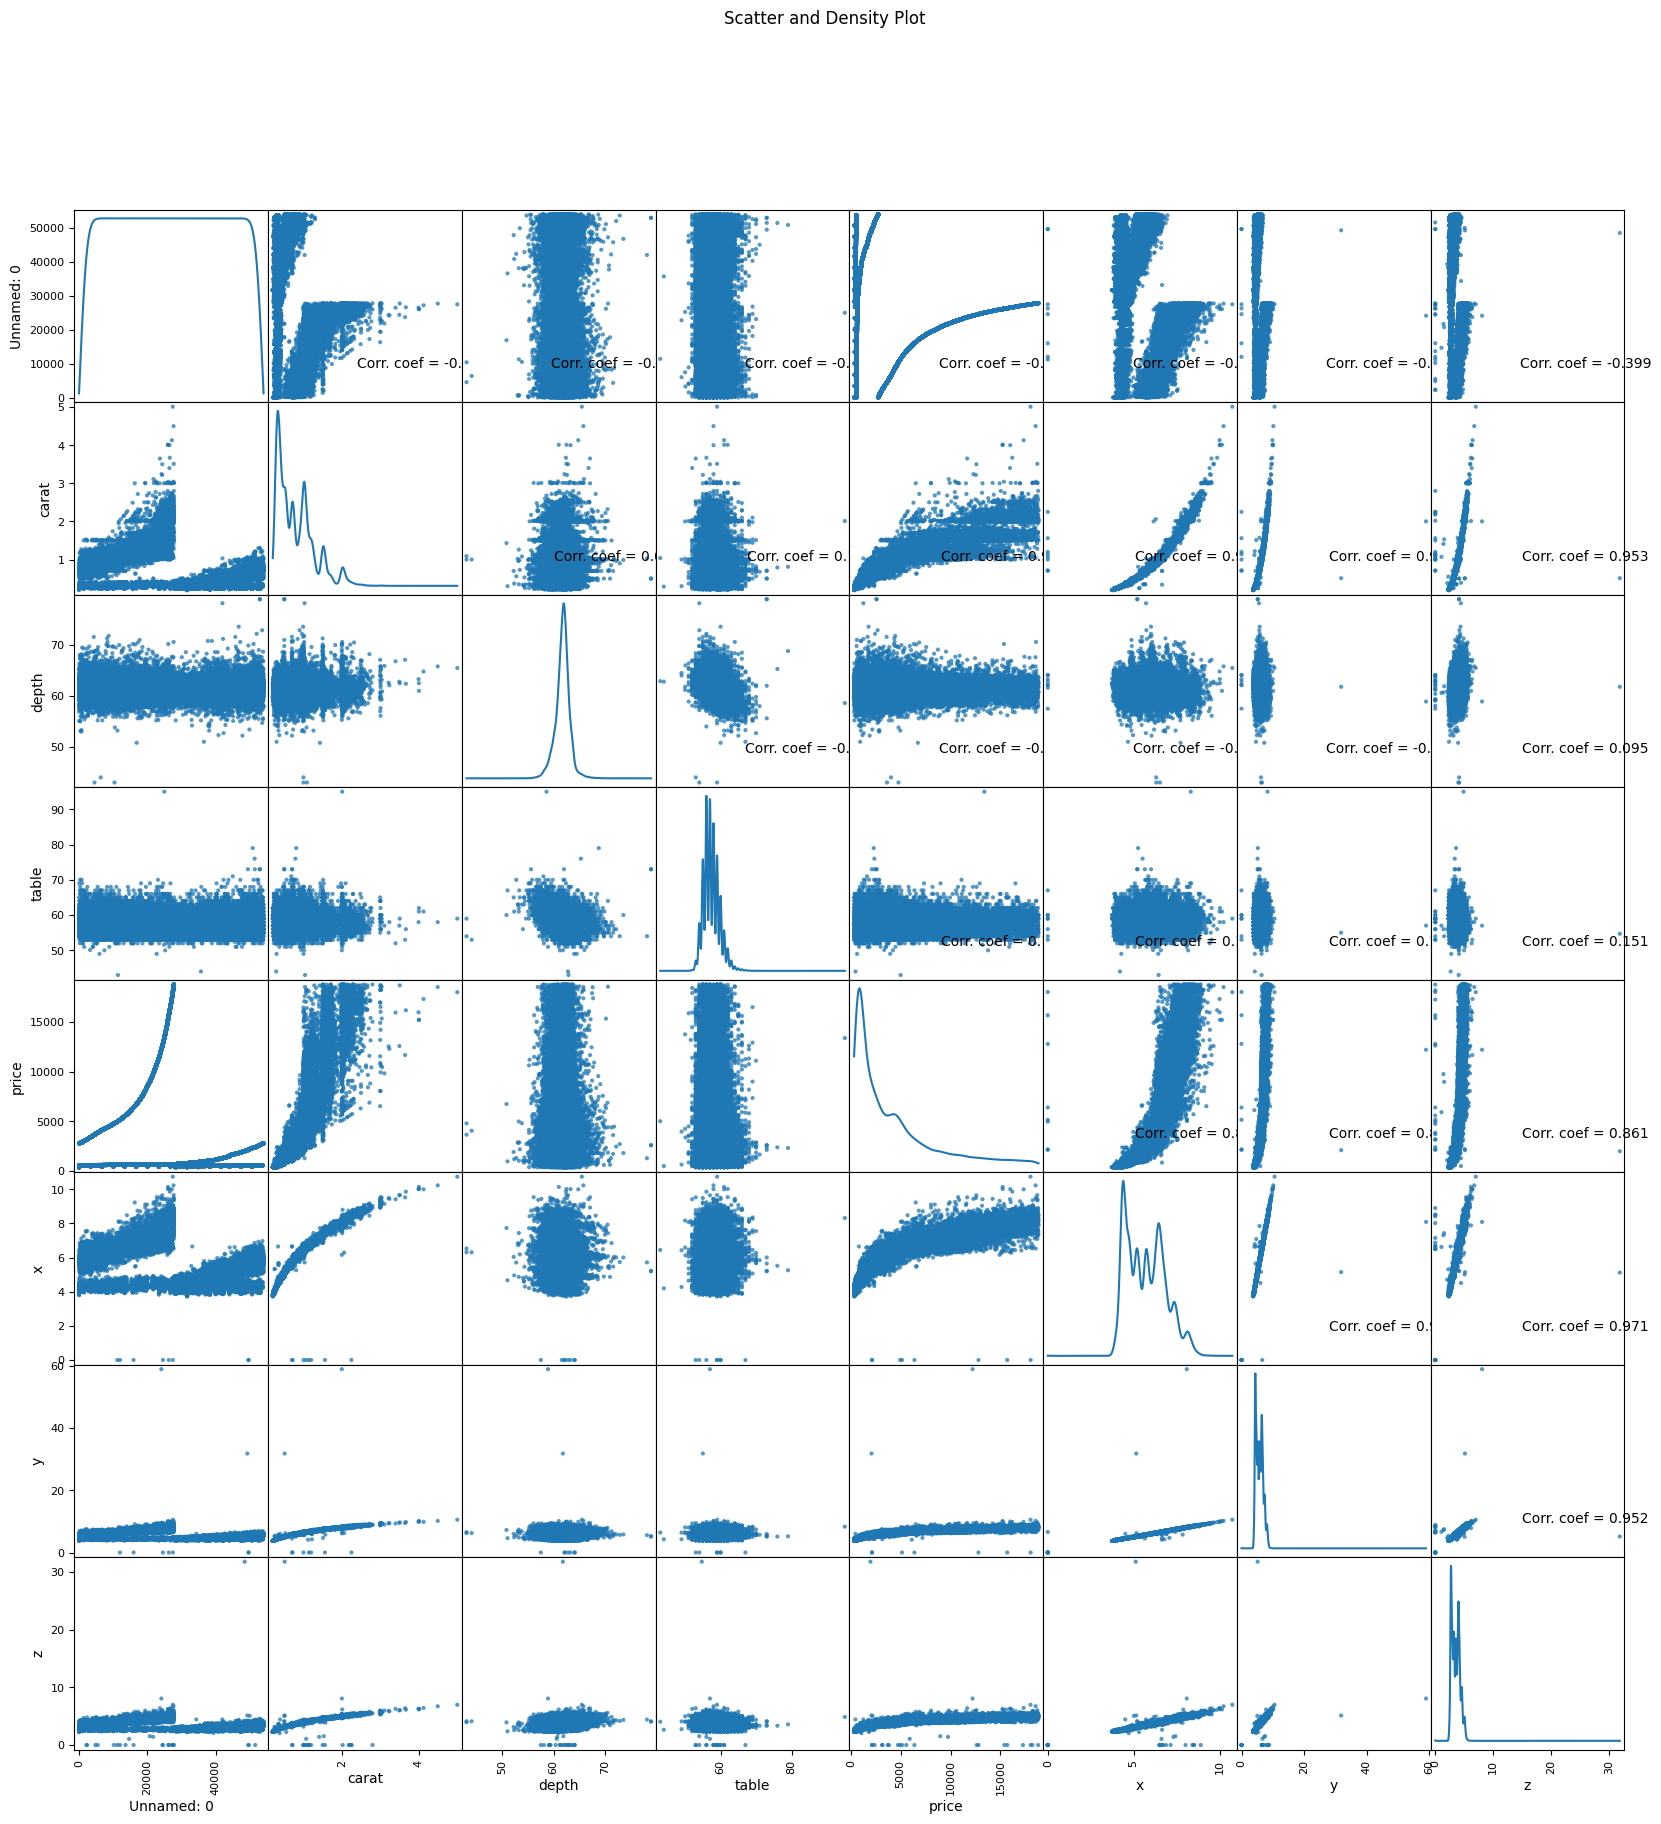

In [21]:
plotScatterMatrix(df, 20, 10)

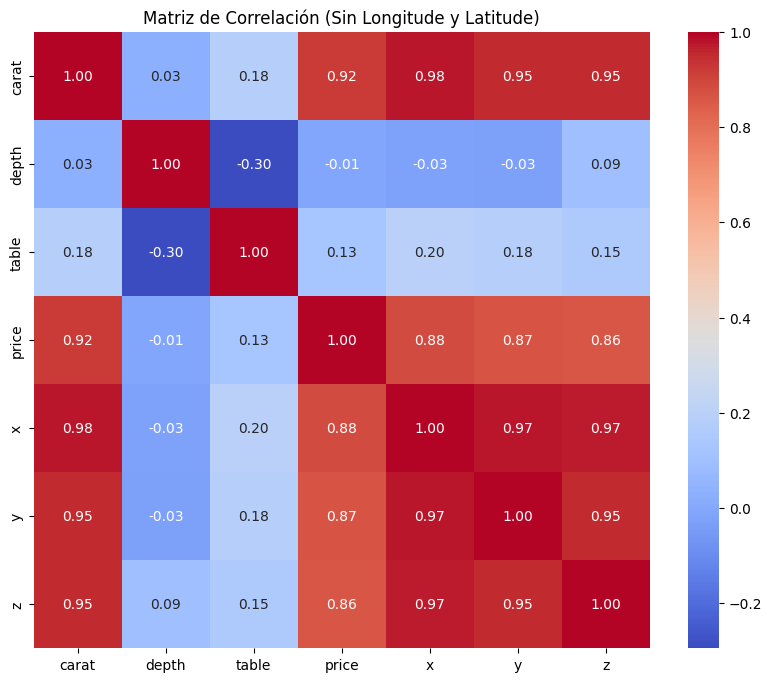

In [24]:
# 1. Filtrar las columnas numéricas excluyendo 'longitude' y 'latitude'
df_numericas_excluidas = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'])

# 2. Calcular la matriz de correlación
matriz_correlacion = df_numericas_excluidas.corr()

# 3. Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación (Sin Longitude y Latitude)')
plt.show()  # Asegúrate de mostrar el gráfico
